# Calibration of an AR model written in Java

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models.ar_model_java.ar1_model import ar1_model


## Compile the Java code and define a target time series

In [2]:
# compile the code
# to run this you need to have the Java compiler installed on your machine
!javac models/ar_model_java/ARModel.java 


In [3]:
# test the Python wrapper of the Java executable
# this will only work if the Java code compiled correctly
ar1_model([0.5, 0.95], 5, 0)


array([[0.        ],
       [1.30253306],
       [0.83586032],
       [3.3749881 ],
       [4.47000946]])

## Select a target time series

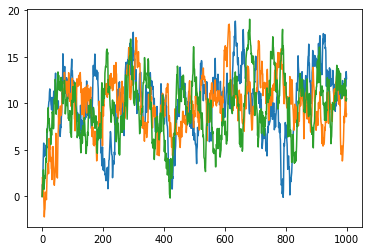

In [4]:
# plot some AR time series
plt.plot(ar1_model([0.5, 0.95], 1000, 0))
plt.plot(ar1_model([0.5, 0.95], 1000, 1))
plt.plot(ar1_model([0.5, 0.95], 1000, 2))


In [5]:
# select one as the "target" time series
target_time_series = ar1_model([0.5, 0.95], 1000, 0)


## Initialise a Calibrator object

In [6]:
from black_it.calibrator import Calibrator
from black_it.loss_functions.msm import MethodOfMomentsLoss

# select a a method of moments loss
loss = MethodOfMomentsLoss()


In [7]:
# choose a set of samplers
from black_it.samplers.halton import HaltonSampler
from black_it.samplers.random_forest import RandomForestSampler

halton = HaltonSampler(batch_size=4)
forest = RandomForestSampler(batch_size=4)

In [8]:
# choose reasonable ranges and precisions for the parameters
parameters_bounds = [[0.01, 0.01], # lower bounds
                    [1.0, 1.0]]    # upper bounds
parameters_precision = [0.01, 0.01]

In [19]:
# initialise the Calibrator object
from black_it.calibrator import Calibrator

# folder where calibration data will be saved
saving_folder = 'ar_calibration'

cal = Calibrator(
    model=ar1_model,
    samplers=[halton, forest],
    loss_function=loss,
    parameters_bounds=parameters_bounds,
    parameters_precision=parameters_precision,
    real_data=target_time_series,
    ensemble_size=3,
    n_jobs=2, 
    saving_folder = saving_folder,
    random_state = 0
)


***
Number of free params:       2.
Explorable param space size: 10000.
***

Selecting 2 processes for the parallel evaluation of the model


## Calibration

In [20]:
# calibrate for 5 epochs
params, losses = cal.calibrate(5)


BATCH NUMBER:   1
PARAMS SAMPLED: 0

METHOD: HaltonSampler
----> sim exec elapsed time: 0.9s
---->   min loss new params: 60.94
---->   avg loss new params: 78.68
----> avg loss exist params: 78.68
---->         curr min loss: 60.940422110925944
====>    total elapsed time: 0.9s

METHOD: RandomForestSampler
----> sim exec elapsed time: 0.8s
---->   min loss new params: 10.21
---->   avg loss new params: 50.04
----> avg loss exist params: 64.36
---->         curr min loss: 10.214849231866609
====>    total elapsed time: 1.9s
Checkpoint saved in 0.0s

BATCH NUMBER:   2
PARAMS SAMPLED: 8

METHOD: HaltonSampler
----> sim exec elapsed time: 0.9s
---->   min loss new params: 6.4
---->   avg loss new params: 74.49
----> avg loss exist params: 67.74
---->         curr min loss: 6.398326733922234
====>    total elapsed time: 0.9s

METHOD: RandomForestSampler
----> sim exec elapsed time: 0.8s
---->   min loss new params: 1.47
---->   avg loss new params: 33444.84
----> avg loss exist params: 84

In [21]:
# best parameters found so far (parameters are sorted by the value of the corresponding losses)
params[0]


array([0.54, 0.95])

## Analyse the calibration using plotting functions

In [22]:
from black_it.plot.plot_results import plot_losses_interact, plot_sampling_interact
from black_it.plot.plot_results import plot_losses

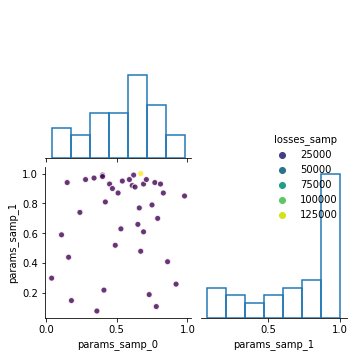

In [23]:
plot_losses(saving_folder)

In [24]:
# note the differences in the samplers used
plot_losses_interact(saving_folder)

interactive(children=(Dropdown(description='method_num', options={'HaltonSampler': 0, 'RandomForestSampler': 1…